#数据集
https://www.kaggle.com/code/ahmedhaytham/i-m-here-transfer-learning-accuracy-0-9683

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
import keras
from tensorflow.keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt

Found 1800 files belonging to 3 classes.
Found 600 files belonging to 3 classes.
Found 300 files belonging to 3 classes.
['cairo', 'moscow', 'paris']


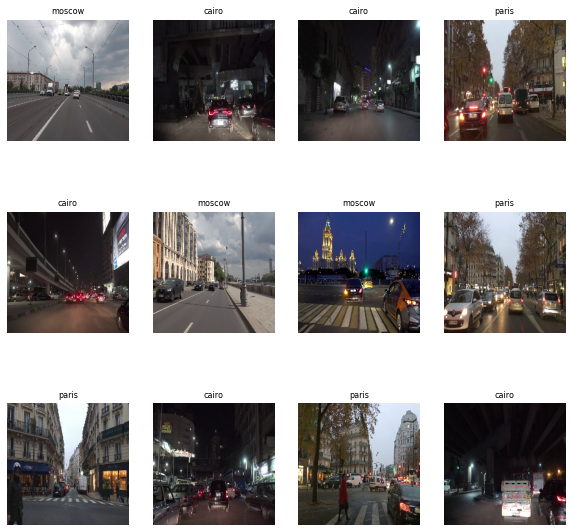

In [41]:
train_dir='./Where am I/archive/data/train'
test_dir = './Where am I/archive/data/test'
val_dir = './Where am I/archive/data/Val'
batch_sizes=64
image_sizes=200
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                    shuffle=True,
                                                                    image_size=(image_sizes,image_sizes),
                                                                    batch_size=batch_sizes)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                    shuffle=True,
                                                                    image_size=(image_sizes,image_sizes),
                                                                    batch_size=batch_sizes)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                                    shuffle=True,
                                                                    image_size=(image_sizes,image_sizes),
                                                                    batch_size=batch_sizes)
class_names = train_dataset.class_names
print(class_names)
plt.figure(figsize=(10,10))
for image_batch,label_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]],fontsize=8)
        
        plt.axis('off')


In [42]:
#from tensorflow.keras.applications.resent50 import preprocess_input
from  tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
import tensorflow.keras as keras
resnet = ResNet50(include_top=False,
                  weights='imagenet',
                  input_shape=(image_size,image_size,3),
                  pooling='max')
output = resnet.layers[-1].output
output = tf.keras.layers.Flatten()(output)
reset = Model(resnet.input,output)
res_name = []
for layer in resnet.layers:
    print(layer)

    res_name.append(layer.name)


In [43]:
#print(res_name)
set_trainable=False
for layer in resnet.layers:
    if layer.name in res_name[-22:]:
        set_trainable = True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [48]:
from tensorflow.keras.layers import Dense,Flatten,GlobalAveragePooling2D,Dropout
model6 = Sequential()
model6.add(resnet)
model6.add(Dense(2048,activation='relu'))
model6.add(Dense(1024,activation='relu'))
model6.add(Dense(512,activation='relu'))
model6.add(Dense(128,activation='relu'))
model6.add(Dense(3,activation='softmax'))
model6.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_10 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 387       
Total params: 30,473,091
Trainable params: 15,816,707
Non-trainable params: 14,656,384
_________________________________

In [53]:
model6.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
epochs=5
history7 = model6.fit(train_dataset,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=val_dataset,
                    verbose=1)

Epoch 1/5
29/29 [==============================] - 158s 5s/step - loss: 0.3220 - accuracy: 0.9661 - val_loss: 173.4218 - val_accuracy: 0.3767
Epoch 2/5
29/29 [==============================] - 160s 6s/step - loss: 0.0091 - accuracy: 0.9983 - val_loss: 155.2437 - val_accuracy: 0.3700
Epoch 3/5
29/29 [==============================] - 168s 6s/step - loss: 0.0058 - accuracy: 0.9989 - val_loss: 58.1975 - val_accuracy: 0.6067
Epoch 4/5
29/29 [==============================] - 168s 6s/step - loss: 7.5387e-07 - accuracy: 1.0000 - val_loss: 15.5135 - val_accuracy: 0.7767
Epoch 5/5
29/29 [==============================] - 162s 6s/step - loss: 9.2092e-04 - accuracy: 0.9994 - val_loss: 9.7895 - val_accuracy: 0.9300


In [ ]:

model6.save('model.h5')
scores = model6.evaluate(test_dataset)
acc = history7.history['accuracy']
val_acc = history7.history['val_accuracy']
loss = history7.history['loss']
val_loss = history7.history['val_loss']

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(3),acc,label='Training ACC')
plt.plot(range(3),val_acc,label='Val ACC')
plt.legend(loc='eppur right')
plt.title('Training and Val ACC')

plt.subplot(1,2,2)
plt.plot(range(3),loss,label='Training LOSS')
plt.plot(range(3),val_loss,label='Val LOSS')
plt.legend(loc='eppur right')
plt.title('Training and Val LOSS')
plt.show()


paris


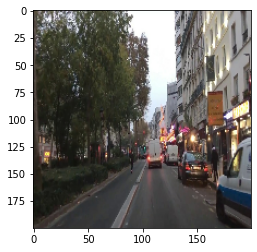

In [55]:
for image_batch,label_batch in test_dataset.take(1):
    first_image = image_batch[23].numpy().astype('uint8')
    first_label = label_batch[23].numpy()
    print()
    plt.imshow(first_image)
    batch_prediction = model6.predict(image_batch)
    print(class_names[np.argmax(batch_prediction[23])])
    

In [98]:
def predict(model,img):
    print(img.shape)#(200, 200, 3)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    
    img_array = tf.expand_dims(img_array,0)
    print(img_array.shape)
    predictions =  model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)  #四舍五入返回浮点数，（data,小数位数）
    return predicted_class,confidence

(200, 200, 3)
(1, 200, 200, 3)
(200, 200, 3)
(1, 200, 200, 3)
(200, 200, 3)
(1, 200, 200, 3)
(200, 200, 3)
(1, 200, 200, 3)
(200, 200, 3)
(1, 200, 200, 3)
(200, 200, 3)
(1, 200, 200, 3)
(200, 200, 3)
(1, 200, 200, 3)
(200, 200, 3)
(1, 200, 200, 3)
(200, 200, 3)
(1, 200, 200, 3)


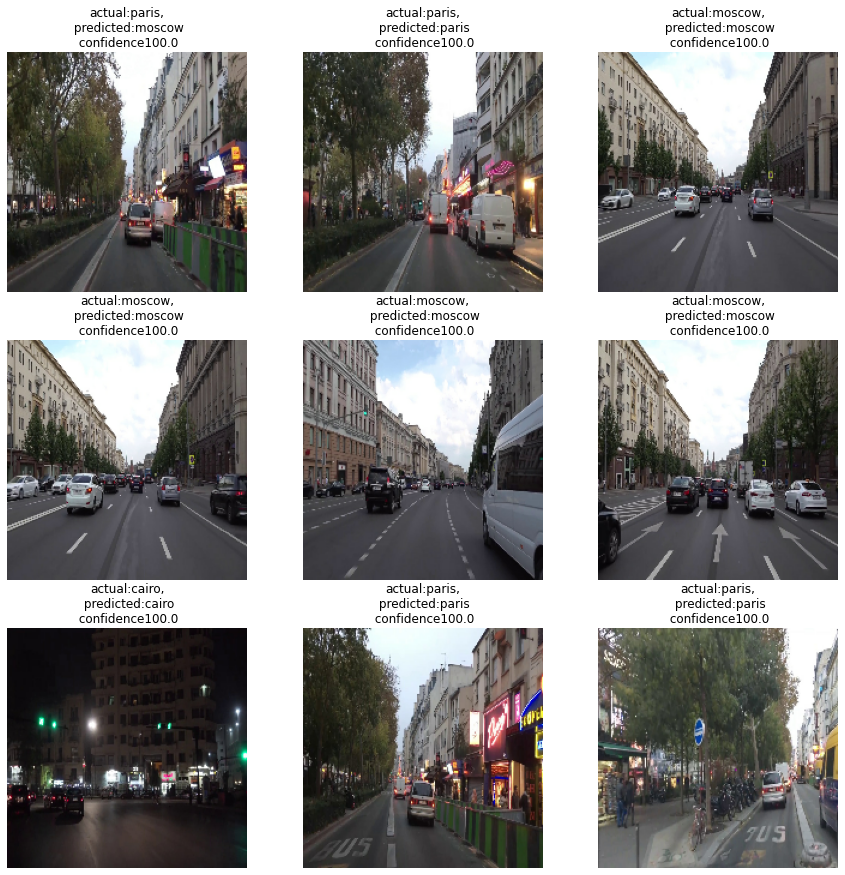

In [102]:
plt.figure(figsize=(15,15))
for images,labels in test_dataset.take(1):
    #print(images[0].numpy().shape)  #(64, 200, 200, 3)
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence = predict(model6,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f'actual:{actual_class},\n predicted:{predicted_class}\n confidence{confidence}')
        plt.axis('off')

In [104]:
#evalate
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [106]:
arr = plt.imread('./Where am I/archive/mos.jpg')
n = tf.image.resize(arr,(200,200))
img_array = tf.keras.preprocessing.image.img_to_array(n.numpy())
img_array = tf.expend_dims(img_array,0)
predictes = model6.predict(img_array)
print('im in ',class_names[np.argmax(predictes[0])])
confidence = rount(100*np.max(predictes[0]))
print('_______________________',confidence)
plt.imshow(arr)

FileNotFoundError: [Errno 2] No such file or directory: './Where am I/archive/mos.jpg'